In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [176]:
df = pd.read_csv('superlig.csv')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272 entries, 0 to 5271
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Takım             5272 non-null   object 
 1   matchdate turkce  5272 non-null   object 
 2   Comp Short        5272 non-null   object 
 3   Hafta             5272 non-null   int64  
 4   Season            5272 non-null   int64  
 5   Season long       5272 non-null   object 
 6   Match Date        5272 non-null   object 
 7   Matchid           5272 non-null   object 
 8   Max date          5272 non-null   object 
 9   month turkce      5272 non-null   object 
 10  GD                5272 non-null   int64  
 11  Goals Agst        5272 non-null   int64  
 12  Goals For         5272 non-null   int64  
 13  Maç               5272 non-null   int64  
 14  Points            5272 non-null   int64  
 15  points gd2        5272 non-null   int64  
 16  X Gd              5272 non-null   float64


In [178]:
df.head()

,Takım,matchdate turkce,Comp Short,Hafta,Season,Season long,Match Date,Matchid,Max date,month turkce,GD,Goals Agst,Goals For,Maç,Points,points gd2,X Gd,X Goals Agst,X Goals For,xPoints bucket
0,Akhisarspor,30 Mayıs 2015,TUR,1,1415,2014-15,8/29/2014,BLKAKH1415,5/30/2015,Mayıs,1,1,2,1,3,301,0.560972,0.483106,1.044078,1.832432
1,Akhisarspor,30 Mayıs 2015,TUR,2,1415,2014-15,9/15/2014,AKHSIV1415,5/30/2015,Mayıs,0,2,2,1,1,100,0.026642,0.963886,0.990529,1.350186
2,Akhisarspor,30 Mayıs 2015,TUR,3,1415,2014-15,9/20/2014,KYEAKH1415,5/30/2015,Mayıs,1,1,2,1,3,301,0.833107,0.653289,1.486396,2.209984
3,Akhisarspor,30 Mayıs 2015,TUR,4,1415,2014-15,9/28/2014,AKHFEN1415,5/30/2015,Mayıs,2,0,2,1,3,302,0.048906,1.015609,1.064514,1.350186
4,Akhisarspor,30 Mayıs 2015,TUR,5,1415,2014-15,10.05.14,BSKAKH1415,5/30/2015,Mayıs,-4,4,0,1,0,-4,-1.855734,2.440619,0.584886,0.169811


### Goals per Game vs Points per Game

In [179]:
df = pd.DataFrame(df.groupby('Goals For')['Points'].sum() / df.groupby('Goals For')['Goals For'].count())

In [180]:
df.reset_index(inplace=True)

In [181]:
df.rename(columns={'Goals For':'Goals',0:'Points'},inplace=True)

In [182]:
df

,Goals,Points
0,0,0.275556
1,1,1.068330
2,2,2.049834
3,3,2.673077
4,4,2.919786
5,5,3.000000
6,6,3.000000
7,7,3.000000


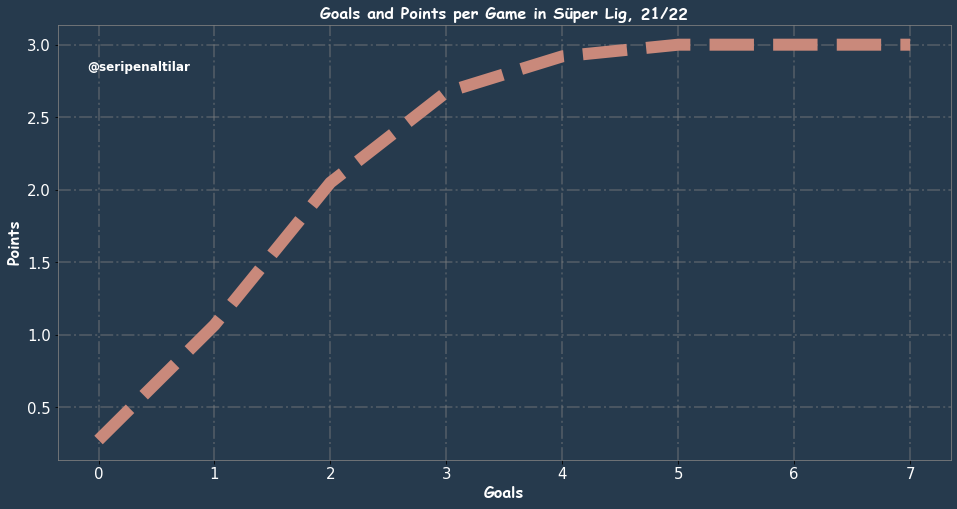

In [183]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')

plt.plot(df['Goals'],df['Points'],lw=12,ls='dashed',c='#c9897b')

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
#ax.xaxis.set_ticks(np.arange(2019, 2023, 1))
plt.title("Goals and Points per Game in Süper Lig, 21/22",fontdict=font)

plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.show()

### Marginal Points

In [184]:
df['Marginal Points']=df.diff()['Points']

In [185]:
df = df.fillna(0)

In [186]:
bar = df[df['Marginal Points']!=0]

In [187]:
bar = bar.round(2)

In [188]:
bar.groupby('Goals')['Marginal Points'].size()

Goals
1    1
2    1
3    1
4    1
5    1
Name: Marginal Points, dtype: int64

In [189]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

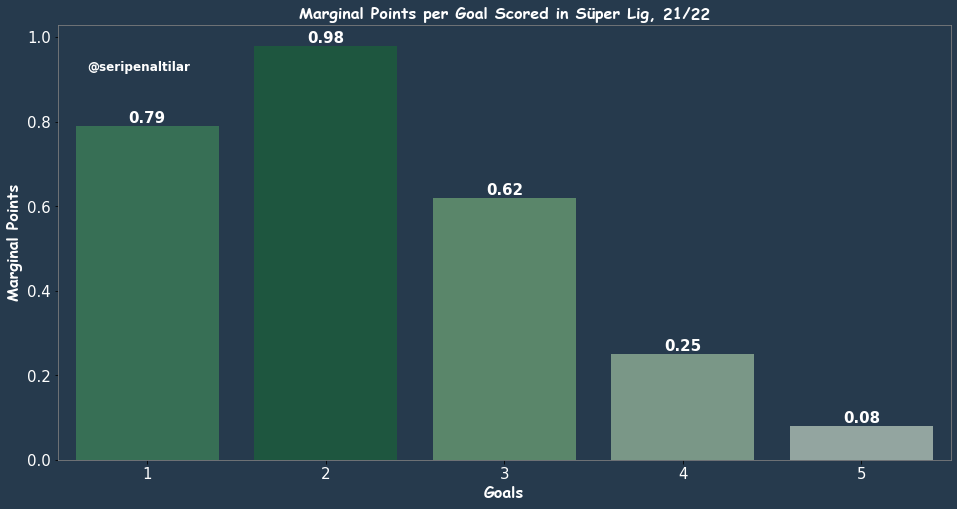

In [190]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')
y = bar['Marginal Points']
ax = sns.barplot(x="Goals", y="Marginal Points", data=bar,palette=colors_from_values(y, "Greens"),alpha=0.6)

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')
ax.bar_label(ax.containers[0],color='white',size=15,fmt='%g',weight='bold')

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Marginal Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.title("Marginal Points per Goal Scored in Süper Lig, 21/22",fontdict=font)

plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.show()

In [191]:
df

,Goals,Points,Marginal Points
0,0,0.275556,0.000000
1,1,1.068330,0.792774
2,2,2.049834,0.981504
3,3,2.673077,0.623243
4,4,2.919786,0.246709
5,5,3.000000,0.080214
6,6,3.000000,0.000000
7,7,3.000000,0.000000
